In [83]:
import numpy as np
%matplotlib inline
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [84]:
datafile = '../result/autobin_result/output1/ekf_correct_output.csv'

temp = np.loadtxt(datafile, delimiter=',', unpack=True)

print('Read \'%s\' successfully.' % datafile)

Read '../result/autobin_result/output1/ekf_correct_output.csv' successfully.


In [85]:
predictfile = '../result/autobin_result/output1/ekf_predict_output.csv'

predict = np.loadtxt(predictfile, delimiter=',', unpack=True)

print('Read \'%s\' successfully.' % predictfile)

Read '../result/autobin_result/output1/ekf_predict_output.csv' successfully.


In [86]:
realfile = '../result/autobin_result/output1/real_output.csv'

real = np.loadtxt(realfile, delimiter=',', unpack=True)

print('Read \'%s\' successfully.' % realfile)

Read '../result/autobin_result/output1/real_output.csv' successfully.


In [87]:
covariancefile = '../result/autobin_result/output1/covariance_output.csv'

covariance = np.loadtxt(covariancefile, delimiter=',', unpack=True)

print('Read \'%s\' successfully.' % covariancefile)

Read '../result/autobin_result/output1/covariance_output.csv' successfully.


In [88]:
measurements = np.vstack((temp))
m = measurements.shape[1]
print(m)

53


In [89]:
real_m = np.vstack((real))
r = real_m.shape[1]
print(r)

53


In [90]:
cov_m = np.vstack((covariance))
s = cov_m.shape[1]
print(r)

53


In [91]:
pred_m = np.vstack((predict))
t = pred_m.shape[1]
print(r)

53


In [92]:
correct_x = np.vstack(temp[2])
correct_y = np.vstack(temp[3])
correct_psis = np.vstack(temp[4])
correct_v = np.vstack(temp[5])


In [93]:
real_x = np.vstack(real[2])
real_y = np.vstack(real[3])

In [94]:
predict_x = np.vstack(predict[2])
predict_y = np.vstack(predict[3])
predict_psis = np.vstack(predict[4])
predict_v = np.vstack(predict[5])

In [95]:
p1 = np.vstack(covariance[2])
p2 = np.vstack(covariance[3])
p3 = np.vstack(covariance[4])
p4 = np.vstack(covariance[5])

In [96]:
def plotx():
    fig = plt.figure(figsize=(16,16))

    plt.subplot(311)
    plt.step(range(len(measurements[0])),correct_x, label='$x$')
    plt.step(range(len(measurements[0])),correct_y, label='$y$')
    plt.step(range(len(measurements[0])),predict_x, label='$x-predict$')
    plt.step(range(len(measurements[0])),predict_y, label='$y-predict$')

    plt.title('Extended Kalman Filter State Estimates - Kitty-data (State Vector $x$)')
    plt.legend(loc='best',prop={'size':22})
    plt.ylabel('Position (relative to start) [m]')

    plt.subplot(312)
    plt.step(range(len(measurements[0])),correct_psis, label='$\psi$')
    plt.step(range(len(measurements[0])),predict_psis, label='$\psi-predict$')
    plt.ylabel('Course')
    plt.legend(loc='best',prop={'size':16})

    plt.subplot(313)
    plt.step(range(len(measurements[0])),correct_v, label='$v$')
    plt.step(range(len(measurements[0])),predict_v, label='$v-predict$')
    plt.ylabel('Velocity')
    #plt.ylim([0, 30])
    plt.legend(loc='best',prop={'size':16})
    plt.xlabel('Filter Step')


    plt.savefig('Autobin-data-Extended-Kalman-Filter-CHCV-State-Estimates.png',
                dpi=72, transparent=True, bbox_inches='tight')

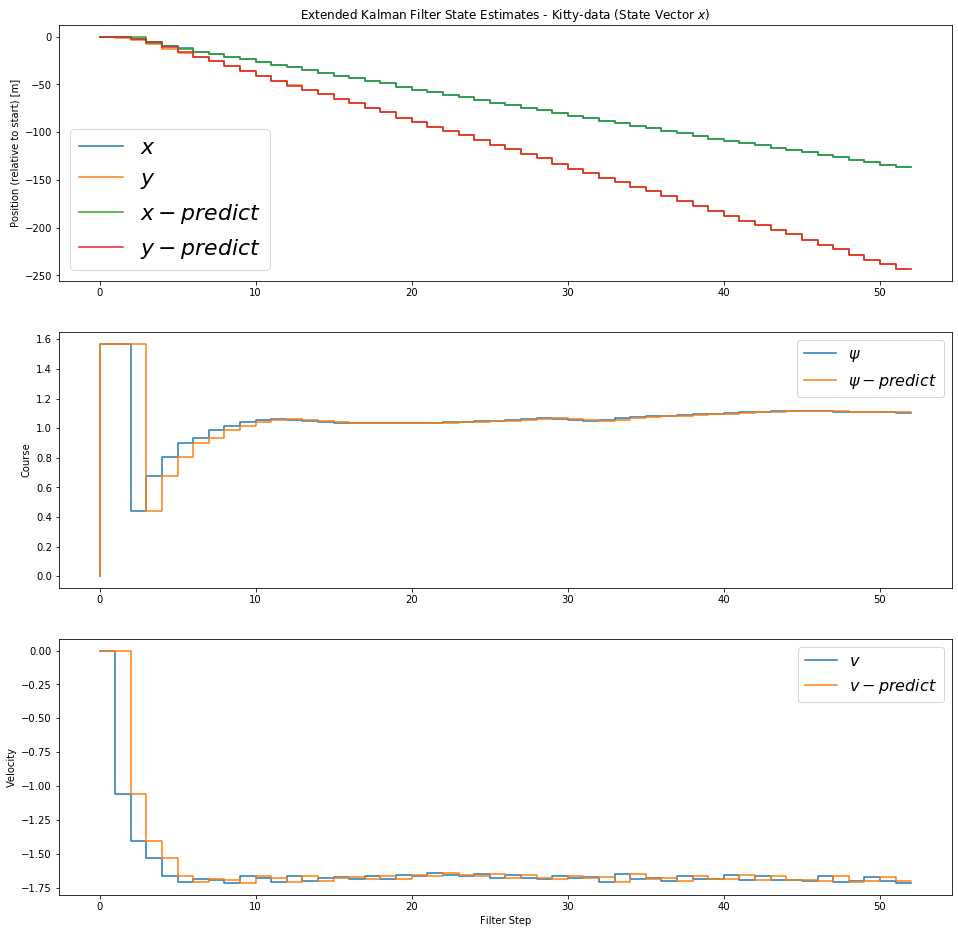

In [97]:
plotx()

In [98]:
def plotxy():

    fig = plt.figure(figsize=(16,9))

    # EKF State
    plt.quiver(correct_x,correct_y,np.cos(correct_psis), np.sin(correct_psis), color='#94C600',
               units='xy', width=0.05, scale=0.5)
    plt.plot(correct_x,correct_y, label='EKF Position', c='k', lw=5)

    # Measurements
    plt.scatter(real_x[::1],real_y[::1], s=50, label='GPS Measurements', marker='+')
    #cbar=plt.colorbar(ticks=np.arange(20))
    #cbar.ax.set_ylabel(u'EPE', rotation=270)
    #cbar.ax.set_xlabel(u'm')

    # Start/Goal
    plt.scatter(correct_x[0],correct_y[0], s=60, label='Start', c='g')
    plt.scatter(correct_x[-1],correct_y[-1], s=60, label='Goal', c='r')

    plt.xlabel('X [m]')
    plt.ylabel('Y [m]')
    plt.title('Position-Autobin-data')
    plt.legend(loc='best')
    plt.axis('equal')
    #plt.tight_layout()

    plt.savefig('Autobin-data-Extended-Kalman-Filter-CHCV-Position.png',
                dpi=72, transparent=True, bbox_inches='tight')

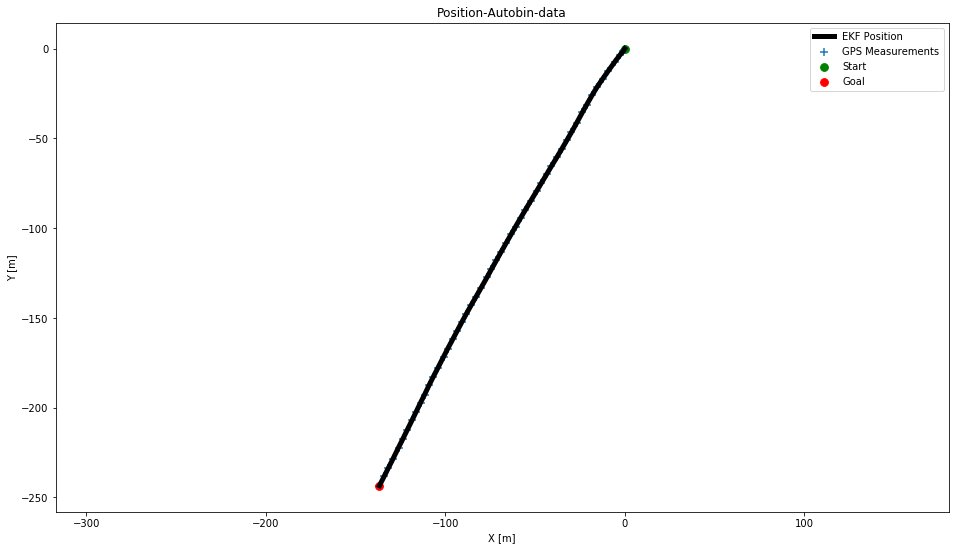

In [99]:
plotxy()

In [100]:
def plotP():
    fig = plt.figure(figsize=(16,9))
    plt.semilogy(range(m),p1, label='$x$')
    plt.step(range(m),p2, label='$y$')
    plt.step(range(m),p3, label='$\psi$')
    plt.step(range(m),p4, label='$v$')

    plt.xlabel('Filter Step')
    plt.ylabel('')
    plt.title('Uncertainty-Autobindata (Elements from Matrix $P$)')
    plt.legend(loc='best',prop={'size':22})

    plt.savefig('Autobin-data-Extended-Kalman-Filter-CHCV-Uncertainty.png',
                dpi=72, transparent=True, bbox_inches='tight')

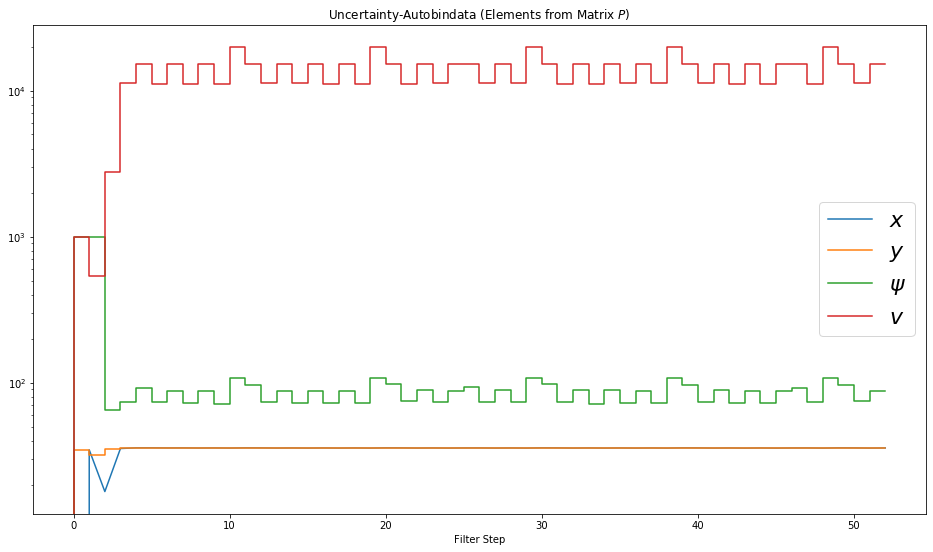

In [101]:
plotP()